# FFT Development

In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

# Define a macrospin mesh (i.e. one discretisation cell).
p1 = (0, 0, 0)  # first point of the mesh domain (m)
p2 = (2e-9, 1e-9, 1e-9)  # second point of the mesh domain (m)
n = (2, 1, 1)  # discretisation

Ms = 8e6  # magnetisation saturation (A/m)
H = (0, 0, 2e6)  # external magnetic field (A/m)
A=1e-12  # Exchange
gamma0 = 2.211e5  # gyromagnetic ratio (m/As)
alpha = 0.1  # Gilbert damping

region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, n=n)

system = mm.System(name='twospin')
system.energy = mm.Zeeman(H=H) + mm.Exchange(A=A)
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)
system.m = df.Field(mesh, dim=3, value=(1, 0, 0), norm=Ms)

td = mc.TimeDriver()
td.drive(system, t=0.1e-9, n=200)

Running OOMMF (DockerOOMMFRunner) [2021/08/20 08:40]... (4.6 s)


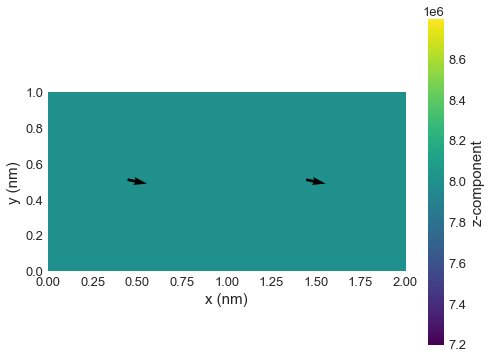

In [2]:
system.m.plane('z').mpl()

In [22]:
import micromagneticdata as md
import numpy as np

In [23]:
drive = md.Drive(name='twospin', number=2)

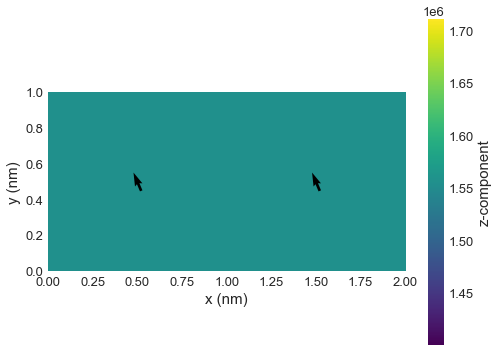

In [24]:
drive[8].plane('z').mpl()

In [153]:
tot = []
for i in np.arange(drive.n):
    tot.append(drive[i].array)
#tot = np.array(tot)

In [155]:
f = np.fft.rfft(tot, axis=0)

In [159]:
f_sum = f.sum(axis=(1,2,3))

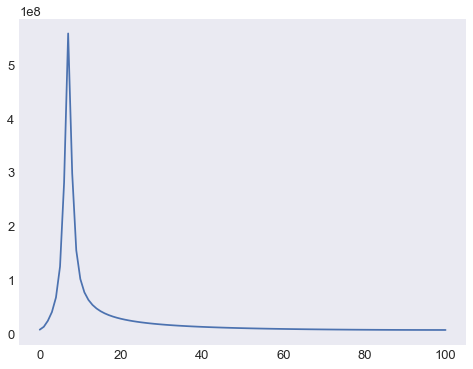

In [163]:
plt.plot(np.abs(f_sum[:,0]))

In [141]:
tot_x = []
tot_y = []
tot_z = []
for i in np.arange(drive.n):
    tot_x.append(drive[i].array[..., 0])
    tot_y.append(drive[i].array[..., 1])
    tot_z.append(drive[i].array[..., 2])

In [143]:
tot2 = np.stack([tot_x,tot_y, tot_z], axis=4)

In [151]:
f_x = np.fft.rfft(tot_x, axis=0)
f_y = np.fft.rfft(tot_y, axis=0)
f_z = np.fft.rfft(tot_z, axis=0)
f_2 = np.stack([f_x,f_y, f_z], axis=4)

In [156]:
np.allclose(f, f_2)

True

In [126]:
tot

[array([[[[7807205.61122592, 1736916.88749111,  175100.74240487]]],
 
 
        [[[7807205.61122592, 1736916.88749111,  175100.74240487]]]]),
 array([[[[7238479.67003829, 3388493.53172196,  350033.78682754]]],
 
 
        [[[7238479.67003829, 3388493.53172196,  350033.78682754]]]]),
 array([[[[6322291.21679768, 4873745.47354076,  524632.08931962]]],
 
 
        [[[6322291.21679768, 4873745.47354076,  524632.08931962]]]]),
 array([[[[5104440.31612559, 6120168.75693003,  698729.88043245]]],
 
 
        [[[5104440.31612559, 6120168.75693003,  698729.88043245]]]]),
 array([[[[3645679.39664363, 7067414.86848946,  872163.29522759]]],
 
 
        [[[3645679.39664363, 7067414.86848946,  872163.29522759]]]]),
 array([[[[2018565.33744724, 7670322.52054628, 1044770.98411901]]],
 
 
        [[[2018565.33744724, 7670322.52054628, 1044770.98411901]]]]),
 array([[[[ 303712.071656  , 7901148.20153535, 1216394.70358313]]],
 
 
        [[[ 303712.071656  , 7901148.20153535, 1216394.70358313]]]]),
 array

In [127]:
tot2

array([[[[[7807205.61122592, 7807205.61122592, 7807205.61122592]]],


        [[[7807205.61122592, 7807205.61122592, 7807205.61122592]]]],



       [[[[7238479.67003829, 7238479.67003829, 7238479.67003829]]],


        [[[7238479.67003829, 7238479.67003829, 7238479.67003829]]]],



       [[[[6322291.21679768, 6322291.21679768, 6322291.21679768]]],


        [[[6322291.21679768, 6322291.21679768, 6322291.21679768]]]],



       ...,



       [[[[ 168468.46841276,  168468.46841276,  168468.46841276]]],


        [[[ 168468.46841276,  168468.46841276,  168468.46841276]]]],



       [[[[ 187423.72279896,  187423.72279896,  187423.72279896]]],


        [[[ 187423.72279896,  187423.72279896,  187423.72279896]]]],



       [[[[ 196727.10632762,  196727.10632762,  196727.10632762]]],


        [[[ 196727.10632762,  196727.10632762,  196727.10632762]]]]])

In [105]:
import matplotlib.pyplot as plt

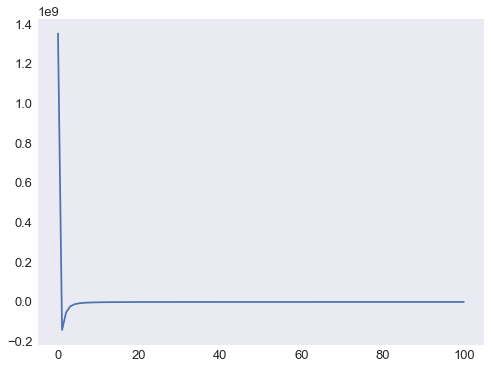

In [110]:
plt.plot(f[:, 0, 0, 0, 2])